In [2]:
import pandas as pd
import warnings
import sys
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,OneHotEncoder

In [3]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
data=pd.read_csv('../Datos/DatosBalanceados_50%.csv')
data.shape
data.head()
data['cargo']=data['cargo'].str.lower()

In [5]:
datos=data[['Valor crédito','Plazo crédito','Fecha desembolso','Plazo residual','Saldo  Capital',
            'Motivo salida' ,'edad','endeudameinto','antigüedad cuando otorgaron el crédito',
            'tiempo trabajado','cargo','tasa','cuota total','Cuentas x Cobrar','Cuo. Ven.','Dias  Mora',
            'Calif. Ope. Sup. Act.','Linea de Credito','Provisión General','Estado Crediticio']]



datos


,Valor crédito,Plazo crédito,Fecha desembolso,Plazo residual,Saldo Capital,Motivo salida,edad,endeudameinto,antigüedad cuando otorgaron el crédito,tiempo trabajado,cargo,tasa,cuota total,Cuentas x Cobrar,Cuo. Ven.,Dias Mora,Calif. Ope. Sup. Act.,Linea de Credito,Provisión General,Estado Crediticio
0,805000000,240,2018-07-18,171.600000,609789731.0,despido,42.934247,17540000,3.583333,3.983333,vicepresidente,0.0161,4.172301e+06,715429.0,3,92,D,Vivienda,6097897.31,Vigente
1,214145276,240,2013-04-09,107.400000,98495900.0,despido,41.117808,321000,1.122222,6.438889,profesional,0.0161,1.024421e+06,13184.0,1,25,A,Vivienda,984959.00,Vigente
2,598693905,240,2012-02-03,93.033333,345432020.0,despido,62.939726,35548000,1.077778,5.997222,secretario general,0.0001,2.497437e+06,4759884.0,1,1009,E,Vivienda,3454320.20,Vigente
3,400000000,240,2018-11-08,175.366667,319075291.0,despido,57.210959,3591000,2.594444,2.486111,profesional,0.0161,2.094759e+06,133625.0,3,72,D,Vivienda,3190752.91,Vigente
4,65691000,84,2019-10-31,31.266667,9712676.0,despido,54.410959,1670000,1.369444,2.086111,director,0.0296,8.059936e+05,1474.0,1,10,A,Vehículo,0.00,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,255000000,240,2013-03-27,106.966667,117837426.0,despido,44.736986,67000,1.166667,1.386111,profesional,0.0161,1.220599e+06,0.0,0,0,A,Vivienda,1178374.26,Vigente
258,116900000,240,2013-03-06,106.266667,54041142.0,despido,57.706849,958000,1.108333,3.713889,analista,0.0161,5.595885e+05,7323.0,0,0,A,Vivienda,540411.42,Vigente
259,275000000,240,2013-09-03,112.300000,131786273.0,despido,41.293151,276000,1.105556,6.530556,profesional,0.0161,1.322647e+06,358226.0,0,0,A,Vivienda,1317862.73,Vigente
260,374617065,240,2012-05-04,96.066667,159675240.0,despido,46.901370,2536000,1.094444,7.783333,gerente,0.0161,1.775135e+06,426324.0,0,0,A,Vivienda,1596752.40,Vigente


In [6]:
datos[['Plazo residual']]=datos[['Plazo residual']].astype(int)
datos



,Valor crédito,Plazo crédito,Fecha desembolso,Plazo residual,Saldo Capital,Motivo salida,edad,endeudameinto,antigüedad cuando otorgaron el crédito,tiempo trabajado,cargo,tasa,cuota total,Cuentas x Cobrar,Cuo. Ven.,Dias Mora,Calif. Ope. Sup. Act.,Linea de Credito,Provisión General,Estado Crediticio
0,805000000,240,2018-07-18,171,609789731.0,despido,42.934247,17540000,3.583333,3.983333,vicepresidente,0.0161,4.172301e+06,715429.0,3,92,D,Vivienda,6097897.31,Vigente
1,214145276,240,2013-04-09,107,98495900.0,despido,41.117808,321000,1.122222,6.438889,profesional,0.0161,1.024421e+06,13184.0,1,25,A,Vivienda,984959.00,Vigente
2,598693905,240,2012-02-03,93,345432020.0,despido,62.939726,35548000,1.077778,5.997222,secretario general,0.0001,2.497437e+06,4759884.0,1,1009,E,Vivienda,3454320.20,Vigente
3,400000000,240,2018-11-08,175,319075291.0,despido,57.210959,3591000,2.594444,2.486111,profesional,0.0161,2.094759e+06,133625.0,3,72,D,Vivienda,3190752.91,Vigente
4,65691000,84,2019-10-31,31,9712676.0,despido,54.410959,1670000,1.369444,2.086111,director,0.0296,8.059936e+05,1474.0,1,10,A,Vehículo,0.00,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,255000000,240,2013-03-27,106,117837426.0,despido,44.736986,67000,1.166667,1.386111,profesional,0.0161,1.220599e+06,0.0,0,0,A,Vivienda,1178374.26,Vigente
258,116900000,240,2013-03-06,106,54041142.0,despido,57.706849,958000,1.108333,3.713889,analista,0.0161,5.595885e+05,7323.0,0,0,A,Vivienda,540411.42,Vigente
259,275000000,240,2013-09-03,112,131786273.0,despido,41.293151,276000,1.105556,6.530556,profesional,0.0161,1.322647e+06,358226.0,0,0,A,Vivienda,1317862.73,Vigente
260,374617065,240,2012-05-04,96,159675240.0,despido,46.901370,2536000,1.094444,7.783333,gerente,0.0161,1.775135e+06,426324.0,0,0,A,Vivienda,1596752.40,Vigente


In [7]:
datos['Mora'] =[1 if datos['Cuo. Ven.'][i]!= 0 else 0 for i in range(262) ]



datos=datos.drop('Cuo. Ven.',axis=1)
datos=datos.drop('Dias  Mora',axis=1)

In [8]:
variables_nominales=['Motivo salida','Linea de Credito','Estado Crediticio']
variables_numericas=['Valor crédito', 'Plazo crédito', 'Plazo residual', 'Saldo  Capital',
                    'edad', 'endeudameinto','antigüedad cuando otorgaron el crédito', 
                    'tiempo trabajado','tasa', 'cuota total', 'Cuentas x Cobrar', 'Provisión General']
variables_ordinales=['cargo','Calif. Ope. Sup. Act.']


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,OneHotEncoder

categorical_encoder = OneHotEncoder(handle_unknown='ignore')

numerical_pipe = MinMaxScaler()

ordinal_encoder = OrdinalEncoder()

preprocessing = ColumnTransformer(
    [
        ("Codificación de Categóricas", categorical_encoder, variables_nominales),
        ("Transformación de numéricas", numerical_pipe, variables_numericas),
        ("ordimal 1",ordinal_encoder,variables_ordinales),
    ],
    verbose_feature_names_out=False,
)


flujo = Pipeline(
    [
        ("Preprocesamiento", preprocessing),
 
    ]
)
flujo.fit(datos)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('Codificación de Categóricas',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Motivo salida',
                                                   'Linea de Credito',
                                                   'Estado Crediticio']),
                                                 ('Transformación de numéricas',
                                                  MinMaxScaler(),
                                                  ['Valor crédito',
                                                   'Plazo crédito',
                                                   'Plazo residual',
                                                   'Saldo  Capital', 'edad',
                                                   'antigüedad cuando '
                                                   'otorgaron el crédito',
                                                   'tiempo trabajado', 'tasa',
                                                   'cuota total',
                                                   'Provisión General']),
                                                 ('ordimal 1', OrdinalEncoder(),
                                                  ['cargo',
                                                   'Calif. Ope. Sup. Act.'])],
                                   verbose_feature_names_out=False))])

In [10]:
primer_paso=flujo['Preprocesamiento']
X=pd.DataFrame(primer_paso.transform(datos), columns=primer_paso.get_feature_names_out())
X.columns

Index(['Motivo salida_despido', 'Motivo salida_pensión',
       'Motivo salida_renuncia', 'Linea de Credito_Libre Inversion',
       'Linea de Credito_Vehículo', 'Linea de Credito_Vivienda',
       'Estado Crediticio_Reestructurado', 'Estado Crediticio_Vigente',
       'Valor crédito', 'Plazo crédito', 'Plazo residual', 'Saldo  Capital',
       'edad', 'antigüedad cuando otorgaron el crédito', 'tiempo trabajado',
       'tasa', 'cuota total', 'Provisión General', 'cargo',
       'Calif. Ope. Sup. Act.'],
      dtype='object')

In [11]:
X

,Motivo salida_despido,Motivo salida_pensión,Motivo salida_renuncia,Linea de Credito_Libre Inversion,Linea de Credito_Vehículo,Linea de Credito_Vivienda,Estado Crediticio_Reestructurado,Estado Crediticio_Vigente,Valor crédito,Plazo crédito,Plazo residual,Saldo Capital,edad,antigüedad cuando otorgaron el crédito,tiempo trabajado,tasa,cuota total,Provisión General,cargo,Calif. Ope. Sup. Act.
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.777228,1.0000,0.728070,0.642246,0.264304,0.098817,0.098730,0.246914,0.520739,0.643276,9.0,3.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.192223,1.0000,0.447368,0.101315,0.220143,0.020576,0.177786,0.246914,0.115355,0.103905,6.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.572964,1.0000,0.385965,0.362565,0.750683,0.019163,0.163566,0.000000,0.305050,0.364401,8.0,4.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.376238,1.0000,0.745614,0.334680,0.611403,0.067379,0.050528,0.246914,0.253193,0.336597,6.0,3.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.045239,0.1875,0.114035,0.007386,0.543329,0.028435,0.037650,0.455247,0.087226,0.000000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.232673,1.0000,0.442982,0.121778,0.308133,0.021989,0.015114,0.246914,0.140619,0.124308,6.0,0.0
258,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.095941,1.0000,0.442982,0.054284,0.623460,0.020134,0.090055,0.246914,0.055494,0.057009,0.0,0.0
259,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.252475,1.0000,0.469298,0.136535,0.224406,0.020046,0.180737,0.246914,0.153761,0.139023,6.0,0.0
260,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.351106,1.0000,0.399123,0.166041,0.360754,0.019693,0.221070,0.246914,0.212032,0.168444,3.0,0.0


In [12]:
Y=datos['Mora']
Y

0      1
1      1
2      1
3      1
4      1
      ..
257    0
258    0
259    0
260    0
261    0
Name: Mora, Length: 262, dtype: int64

In [13]:
df_codificados= pd.merge( pd.DataFrame(Y, columns=['Mora']),X,left_index=True, right_index=True)
df_codificados

,Mora,Motivo salida_despido,Motivo salida_pensión,Motivo salida_renuncia,Linea de Credito_Libre Inversion,Linea de Credito_Vehículo,Linea de Credito_Vivienda,Estado Crediticio_Reestructurado,Estado Crediticio_Vigente,Valor crédito,...,Plazo residual,Saldo Capital,edad,antigüedad cuando otorgaron el crédito,tiempo trabajado,tasa,cuota total,Provisión General,cargo,Calif. Ope. Sup. Act.
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.777228,...,0.728070,0.642246,0.264304,0.098817,0.098730,0.246914,0.520739,0.643276,9.0,3.0
1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.192223,...,0.447368,0.101315,0.220143,0.020576,0.177786,0.246914,0.115355,0.103905,6.0,0.0
2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.572964,...,0.385965,0.362565,0.750683,0.019163,0.163566,0.000000,0.305050,0.364401,8.0,4.0
3,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.376238,...,0.745614,0.334680,0.611403,0.067379,0.050528,0.246914,0.253193,0.336597,6.0,3.0
4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.045239,...,0.114035,0.007386,0.543329,0.028435,0.037650,0.455247,0.087226,0.000000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.232673,...,0.442982,0.121778,0.308133,0.021989,0.015114,0.246914,0.140619,0.124308,6.0,0.0
258,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.095941,...,0.442982,0.054284,0.623460,0.020134,0.090055,0.246914,0.055494,0.057009,0.0,0.0
259,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.252475,...,0.469298,0.136535,0.224406,0.020046,0.180737,0.246914,0.153761,0.139023,6.0,0.0
260,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.351106,...,0.399123,0.166041,0.360754,0.019693,0.221070,0.246914,0.212032,0.168444,3.0,0.0


In [14]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
X_train

,Motivo salida_despido,Motivo salida_pensión,Motivo salida_renuncia,Linea de Credito_Libre Inversion,Linea de Credito_Vehículo,Linea de Credito_Vivienda,Estado Crediticio_Reestructurado,Estado Crediticio_Vigente,Valor crédito,Plazo crédito,Plazo residual,Saldo Capital,edad,antigüedad cuando otorgaron el crédito,tiempo trabajado,tasa,cuota total,Provisión General,cargo,Calif. Ope. Sup. Act.
101,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.153896,1.0,0.535088,0.174728,0.423633,0.304309,0.296637,0.000000,0.077746,0.177106,0.0,4.0
16,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.282772,1.0,0.368421,0.123878,0.422301,0.390675,0.477643,0.246914,0.168113,0.126402,4.0,0.0
106,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.620594,1.0,0.539474,0.409921,0.520416,0.071176,0.289751,0.246914,0.397910,0.411621,9.0,0.0
75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.282772,1.0,0.368421,0.123878,0.422301,0.390675,0.477643,0.246914,0.168113,0.126402,4.0,0.0
255,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.200000,1.0,0.491228,0.112587,0.146273,0.024108,0.072438,0.246914,0.121411,0.115144,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.332978,1.0,0.495614,0.174385,0.714048,0.025256,0.310231,0.246914,0.203570,0.176764,6.0,0.0
192,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.376238,1.0,0.846491,0.356059,0.118031,0.086454,0.134591,0.246914,0.256685,0.357914,6.0,0.0
117,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.321782,1.0,0.535088,0.218907,0.742490,0.193836,0.319263,0.246914,0.204774,0.221157,6.0,0.0
47,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.376238,1.0,0.745614,0.334680,0.611403,0.067379,0.050528,0.246914,0.253193,0.336597,6.0,3.0


In [15]:

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance


parametros = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-4, 4, 10),
    "max_iter": [1000, 2000, 5000],
}
RL = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear',random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)

flujo_logistica= Pipeline(
    [
        ("Modelo",RL),
         
    ]
)
flujo_logistica.fit(X_train,Y_train.ravel())

Pipeline(steps=[('Modelo',
                 GridSearchCV(cv=10,
                              estimator=LogisticRegression(random_state=0,
                                                           solver='liblinear'),
                              n_jobs=-1,
                              param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                          'max_iter': [1000, 2000, 5000],
                                          'penalty': ['l1', 'l2']},
                              scoring='accuracy'))])

In [16]:
from tabulate import tabulate

modelo_RL=flujo_logistica["Modelo"]

tabla = [
    ["C", modelo_RL.best_params_["C"] ],
    ["Max_iter",modelo_RL.best_params_["max_iter"]],
    ["penalty",modelo_RL.best_params_["penalty"]],
    ["Accuracy entrenamiento",flujo_logistica.score(X_train,Y_train)],
    ["Accuracy test",flujo_logistica.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤════════════════════╕
│ C                      │ 2.782559402207126  │
├────────────────────────┼────────────────────┤
│ Max_iter               │ 1000               │
├────────────────────────┼────────────────────┤
│ penalty                │ l1                 │
├────────────────────────┼────────────────────┤
│ Accuracy entrenamiento │ 0.7595628415300546 │
├────────────────────────┼────────────────────┤
│ Accuracy test          │ 0.7215189873417721 │
╘════════════════════════╧════════════════════╛


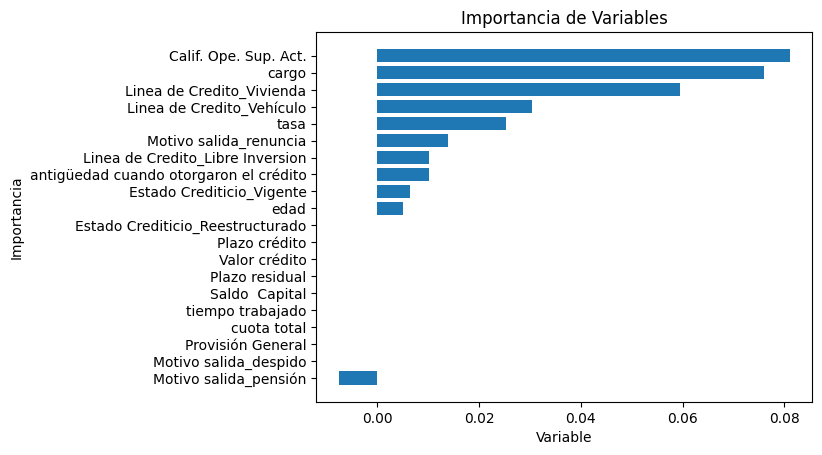

In [17]:
results = permutation_importance(
    flujo_logistica, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
parametros = {'var_smoothing': np.linspace(0.001, 1, 10)}  


NB = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=parametros,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)

flujo_NB= Pipeline(
    [
        ("Modelo",NB),
         
    ]
)
flujo_NB.fit(X_train,Y_train.ravel())

Pipeline(steps=[('Modelo',
                 GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
                              param_grid={'var_smoothing': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
                              scoring='accuracy'))])

In [19]:
modelo_NB=flujo_NB["Modelo"]

tabla = [
    ["var_smoothing", modelo_NB.best_params_["var_smoothing"] ],


    ["Accuracy entrenamiento",flujo_NB.score(X_train,Y_train)],
    ["Accuracy test",flujo_NB.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤══════════╕
│ var_smoothing          │ 0.001    │
├────────────────────────┼──────────┤
│ Accuracy entrenamiento │ 0.754098 │
├────────────────────────┼──────────┤
│ Accuracy test          │ 0.772152 │
╘════════════════════════╧══════════╛


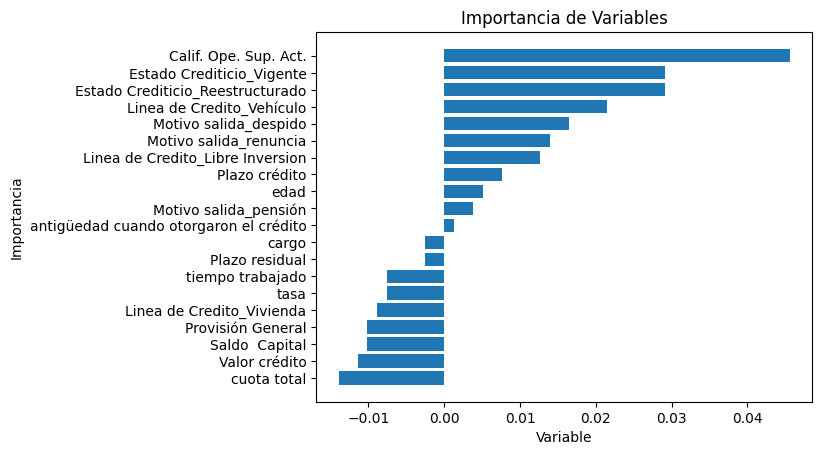

In [20]:
results = permutation_importance(
    flujo_NB, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier


parametros =  {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    "min_samples_split": [2, 5, 10,20,50],
    "min_samples_leaf": [1, 2, 5,10,20],

} 


AC = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)

flujo_AC= Pipeline(
    [
   
        ("Modelo",AC),
         
    ]
)

flujo_AC.fit(X_train,Y_train)

Pipeline(steps=[('Modelo',
                 GridSearchCV(cv=10,
                              estimator=DecisionTreeClassifier(random_state=0),
                              n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23],
                                          'min_samples_leaf': [1, 2, 5, 10, 20],
                                          'min_samples_split': [2, 5, 10, 20,
                                                                50]},
                              scoring='accuracy'))])

In [22]:
modelo_AC=flujo_AC["Modelo"]

tabla = [
    ["criterion", modelo_AC.best_params_["criterion"] ],
    ["max_depth", modelo_AC.best_params_["max_depth"] ],
    ["min_samples_split", modelo_AC.best_params_["min_samples_split"] ],
    ["min_samples_leaf", modelo_AC.best_params_["min_samples_leaf"] ],

    ["Accuracy entrenamiento",flujo_AC.score(X_train,Y_train)],
    ["Accuracy test",flujo_AC.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤════════════════════╕
│ criterion              │ entropy            │
├────────────────────────┼────────────────────┤
│ max_depth              │ 13                 │
├────────────────────────┼────────────────────┤
│ min_samples_split      │ 2                  │
├────────────────────────┼────────────────────┤
│ min_samples_leaf       │ 1                  │
├────────────────────────┼────────────────────┤
│ Accuracy entrenamiento │ 1.0                │
├────────────────────────┼────────────────────┤
│ Accuracy test          │ 0.9367088607594937 │
╘════════════════════════╧════════════════════╛


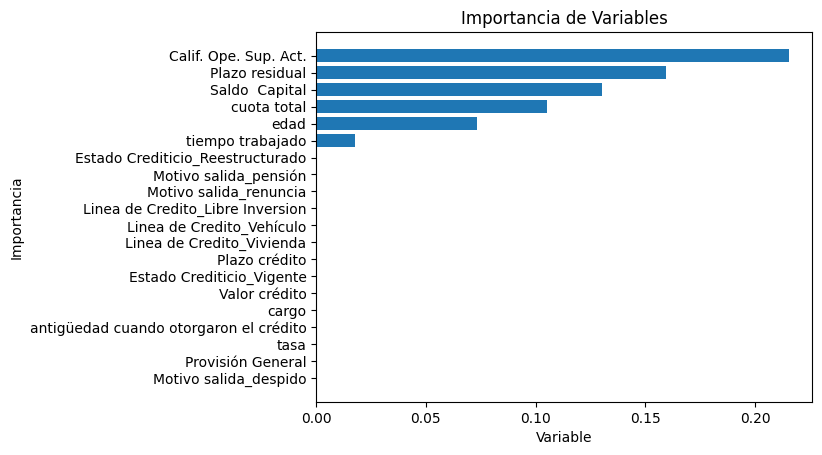

In [23]:
results = permutation_importance(
    flujo_AC, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [24]:

%%capture
from sklearn.ensemble import RandomForestClassifier


parametros =  {
    'criterion':['gini', 'entropy'],
    "n_estimators": [100, 200, 300],  # Número de árboles
    "max_depth": [2, 4, 6,8,10],          # Profundidad máxima de los árboles
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],    # Mínimo de muestras en una hoja final
}


RF= GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)

flujo_RF= Pipeline(
    [
       # ("Preprocesamiento", preprocessing),
        ("Modelo",RF),
         
    ]
)

flujo_RF.fit(X_train,Y_train.ravel())

In [25]:
modelo_RF=flujo_RF["Modelo"]

tabla = [
    ["criterion", modelo_RF.best_params_["criterion"] ],
    ["max_depth", modelo_RF.best_params_["max_depth"] ],
    ["min_samples_split", modelo_RF.best_params_["min_samples_split"] ],
    ["min_samples_leaf", modelo_RF.best_params_["min_samples_leaf"] ],

    ["Accuracy entrenamiento",flujo_RF.score(X_train,Y_train)],
    ["Accuracy test",flujo_RF.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤════════════════════╕
│ criterion              │ gini               │
├────────────────────────┼────────────────────┤
│ max_depth              │ 10                 │
├────────────────────────┼────────────────────┤
│ min_samples_split      │ 2                  │
├────────────────────────┼────────────────────┤
│ min_samples_leaf       │ 2                  │
├────────────────────────┼────────────────────┤
│ Accuracy entrenamiento │ 1.0                │
├────────────────────────┼────────────────────┤
│ Accuracy test          │ 0.9746835443037974 │
╘════════════════════════╧════════════════════╛


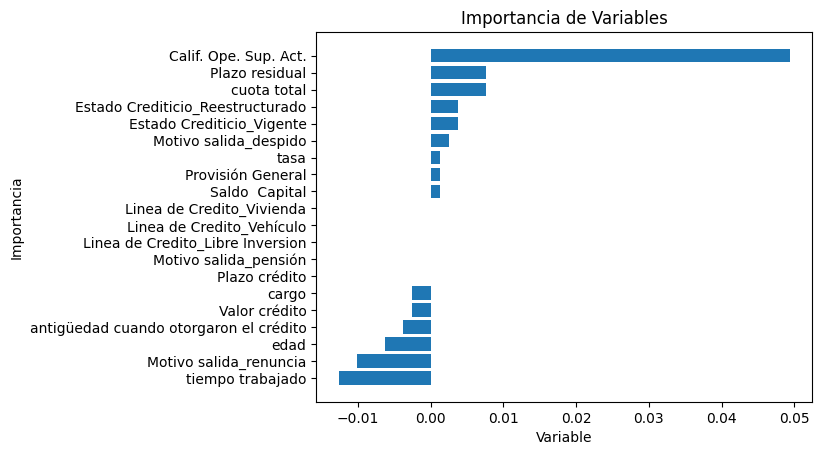

In [26]:
results = permutation_importance(
    flujo_RF, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

parametros =  {
   
    "C": np.logspace(-3, 3, 10),
    "gamma": np.logspace(-3, 3, 10),
    "kernel": ["rbf"]
}


MSV = RandomizedSearchCV(estimator=SVC(random_state=0), 
                         param_distributions=parametros, 
                         n_iter=100, cv=10)

flujo_MSV= Pipeline(
    [
        #("Preprocesamiento", preprocessing),
        ("Modelo",MSV),
         
    ]
)

flujo_MSV.fit(X_train,Y_train)

Pipeline(steps=[('Modelo',
                 RandomizedSearchCV(cv=10, estimator=SVC(random_state=0),
                                    n_iter=100,
                                    param_distributions={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                                         'gamma': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                                         'kernel': ['rbf']}))])

In [28]:
modelo_SV=flujo_MSV["Modelo"]

tabla = [
    ["C", modelo_SV.best_params_["C"] ],
    ["gamma", modelo_SV.best_params_["gamma"] ],
    ["kernel", modelo_SV.best_params_["kernel"] ],
   

    ["Accuracy entrenamiento",flujo_MSV.score(X_train,Y_train)],
    ["Accuracy test",flujo_MSV.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤═════════════════════╕
│ C                      │ 0.46415888336127775 │
├────────────────────────┼─────────────────────┤
│ gamma                  │ 215.44346900318823  │
├────────────────────────┼─────────────────────┤
│ kernel                 │ rbf                 │
├────────────────────────┼─────────────────────┤
│ Accuracy entrenamiento │ 1.0                 │
├────────────────────────┼─────────────────────┤
│ Accuracy test          │ 1.0                 │
╘════════════════════════╧═════════════════════╛


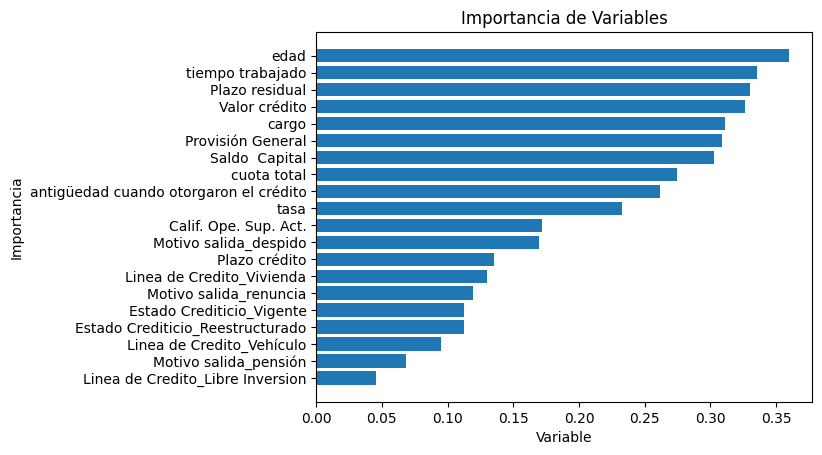

In [29]:
results = permutation_importance(
    flujo_MSV, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()

In [30]:
from xgboost import XGBClassifier

parametros =   {
  'learning_rate': [0.01,0.05, 0.1, 0.3],  # Tasa de aprendizaje
  'max_depth': [3, 5, 8,10,15],           # Profundidad máxima de los árboles
  'n_estimators': [100, 200, 300],  # Número de árboles
  'min_child_weight': [1, 3, 5],     # Peso mínimo de los nodos hijos
  'gamma': [0, 0.1, 0.3],            # Control de crecimiento del árbol
}



XB = RandomizedSearchCV(estimator=XGBClassifier(objective='binary:logistic',random_state=0), 
                         param_distributions=parametros, 
                         n_iter=100, cv=10)

flujo_XB= Pipeline(
    [
        #("Preprocesamiento", preprocessing),
        ("Modelo",XB),
         
    ]
)

flujo_XB.fit(X_train,Y_train)

Pipeline(steps=[('Modelo',
                 RandomizedSearchCV(cv=10,
                                    estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importance_type=None,
                                                            interaction_con...
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=0, ...),
                                    n_iter=100,
                                    param_distributions={'gamma': [0, 0.1, 0.3],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.3],
                                                         'max_depth': [3, 5, 8,
                                                                       10, 15],
                                                         'min_child_weight': [1,
                                                                              3,
                                                                              5],
                                                         'n_estimators': [100,
                                                                          200,
                                                                          300]}))])

In [31]:
modelo_XB=flujo_XB["Modelo"]

tabla = [
    ["learning_rate", modelo_XB.best_params_["learning_rate"] ],
    ["max_depth", modelo_XB.best_params_["max_depth"] ],
    ["n_estimators", modelo_XB.best_params_["n_estimators"] ],
    ["min_child_weight", modelo_XB.best_params_["min_child_weight"] ],
    ["gamma", modelo_XB.best_params_["gamma"] ],
    ["Accuracy entrenamiento",flujo_XB.score(X_train,Y_train)],
    ["Accuracy test",flujo_XB.score(X_test,Y_test)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤════════════╕
│ learning_rate          │   0.3      │
├────────────────────────┼────────────┤
│ max_depth              │  15        │
├────────────────────────┼────────────┤
│ n_estimators           │ 300        │
├────────────────────────┼────────────┤
│ min_child_weight       │   1        │
├────────────────────────┼────────────┤
│ gamma                  │   0        │
├────────────────────────┼────────────┤
│ Accuracy entrenamiento │   1        │
├────────────────────────┼────────────┤
│ Accuracy test          │   0.949367 │
╘════════════════════════╧════════════╛


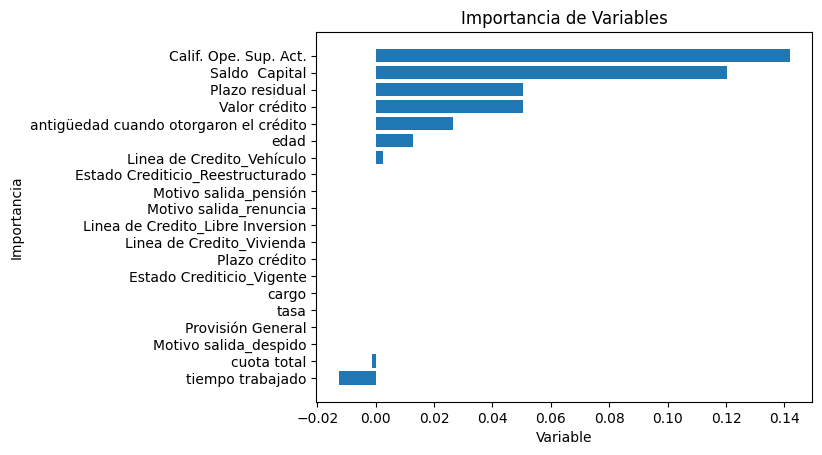

In [32]:
results = permutation_importance(
    flujo_XB, X_test, Y_test, scoring="accuracy", n_repeats=10  # Adjust n_repeats
)

# Extract importances for each feature
importances = results.importances_mean

feature_names = X_test.columns
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

import matplotlib.pyplot as plt

# Definir los nombres de las variables
feature_names = X_test.columns

# Ordenar las variables por importancia
sorted_indices = importances.argsort()
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Elegir tipo de gráfica (ejemplo: barra)
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Variable")
plt.ylabel("Importancia")
plt.title("Importancia de Variables")
plt.show()